<div>
<img src="https://drive.google.com/uc?export=view&id=1vK33e_EqaHgBHcbRV_m38hx6IkG0blK_" width="350"/>
</div> 

#**Artificial Intelligence - MSc**

##***CS5014 - Data Science***

### E-tivity 2a

This E-tivity addresses the principles of problem modeling for optimization, and it is in line with the learning outcomes to demonstrate an ability to formulate machine learning and other data exploration algorithms as optimization algorithms.

Student Name: David Mulhall
ID: 12128856

# One Max problem

This practice addresses the [One Max problem](https://tracer.lcc.uma.es/problems/onemax/onemax.html) using [DEAP](https://github.com/deap). The One Max task is to find the binary string of a given length that maximizes the sum of its digits.

[This notebook](https://github.com/DEAP/notebooks/blob/master/OneMax.ipynb) is a detailed example on using DEAP for solving the One Max problem by using genetic algorithms.

[This video](https://youtu.be/MacVqujSXWE) addresses the knapsack problem to explain the basics on [genetic algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm).

## Imports

In [1]:
!pip install deap

In [2]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy as np

import matplotlib.pyplot as plt
from tqdm import tqdm


## Parameters

In [3]:
## Problem parameters:
# Length of the bit string to be optimized
# each bit is considered as a gen in the encoding
ONE_MAX_LENGTH = 10  

## Genetic Algorithm parameters:
POPULATION_SIZE = 10
# probability for crossover
P_CROSSOVER = 0.7  
# probability for mutating an individual
P_MUTATION = 0.01  
# Number of generations (iterations)
MAX_GENERATIONS = 50
# Number of best solutions to save
HALL_OF_FAME_SIZE = 10
# Random seed
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

## Population

In [4]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

## Evaluation

In [5]:
# Fitness function
# compute the number of '1's in the individual
# each bit position 
def oneMaxFitness(individual):
    # return a tuple
    return sum(individual),  

toolbox.register("evaluate", oneMaxFitness)

## Genetic Operations

In [6]:
# genetic operators:

# Roulette selection:
toolbox.register("select", tools.selRoulette)

## Tournament selection
# selTournament(individuals, k)
# individuals – a list of individuals to select from
# k – The number of individuals to select
# uncomment the following line and comment the Roulette selection
#####toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

## Genetic Algorithm

gen	nevals	max	avg
0  	10    	7  	4.4
1  	6     	6  	4.6
2  	6     	6  	4.8
3  	4     	7  	5.4
4  	8     	8  	5.9
5  	10    	8  	6  
6  	10    	8  	6.3
7  	4     	8  	6.7
8  	6     	8  	6.8
9  	8     	8  	6.3
10 	10    	8  	6.6
11 	10    	8  	7  
12 	8     	8  	7.1
13 	10    	8  	7  
14 	6     	8  	6.8
15 	10    	8  	6.9
16 	10    	8  	7.1
17 	6     	8  	7.1
18 	8     	8  	7.2
19 	6     	8  	7.5
20 	10    	8  	7.7
21 	4     	8  	7.9
22 	8     	8  	7.9
23 	7     	8  	7.8
24 	8     	8  	7.6
25 	6     	8  	7.8
26 	6     	8  	8  
27 	8     	8  	8  
28 	6     	8  	8  
29 	6     	8  	8  
30 	0     	8  	8  
31 	8     	8  	8  
32 	6     	8  	8  
33 	6     	8  	8  
34 	8     	8  	8  
35 	6     	8  	8  
36 	10    	8  	8  
37 	10    	8  	8  
38 	4     	8  	8  
39 	6     	8  	8  
40 	4     	8  	8  
41 	4     	8  	8  
42 	6     	8  	8  
43 	8     	8  	8  
44 	6     	8  	8  
45 	6     	8  	8  
46 	6     	8  	8  
47 	10    	8  	8  
48 	8     	8  	8  
49 	6     	8  	8  
50 	10    	8  	8  
Hall of Fame

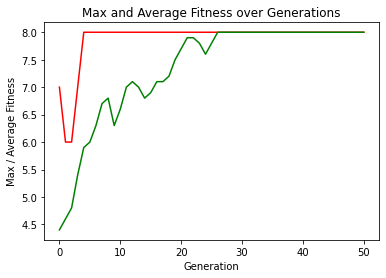

In [7]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", np.max)
stats.register("avg", np.mean)

# perform the Genetic Algorithm flow:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                          ngen=MAX_GENERATIONS,
                                          stats=stats, halloffame=hof, verbose=True)

# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])

# Genetic Algorithm is done - extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# Genetic Algorithm is done - plot statistics:
#sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')
plt.show()

In [8]:
hof.items[0]

[1, 1, 1, 1, 0, 1, 1, 0, 1, 1]

In [9]:
def run_Exp(Fitness_Func, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 10, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k = 10, plot = False, _print = False):
    
    '''
        Function that tries to maxumise One Max problem
    '''
    
    toolbox = base.Toolbox()

    # create an operator that randomly returns 0 or 1:
    toolbox.register("zeroOrOne", random.randint, 0, 1)

    # define a single objective, maximizing fitness strategy:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))

    # create the Individual class based on list:
    creator.create("Individual", list, fitness=creator.FitnessMax)

    # create the individual operator to fill up an Individual instance:
    toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

    # create the population operator to generate a list of individuals:
    toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

    # Fitness function
    toolbox.register("evaluate", Fitness_Func)

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)    
    
    # genetic operators:
    if sel == 'Roulette':
        # Roulette selection:
        toolbox.register("select", tools.selRoulette)
    elif sel == 'Tournament':
        # Tournament selection
#         individuals = population
        toolbox.register("select", tools.selTournament, tournsize=k)

    # Single-point crossover:
    toolbox.register("mate", tools.cxOnePoint)

    # Flip-bit mutation:
    # indpb: Independent probability for each attribute to be flipped
    toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)
    

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("max", np.max)
    stats.register("avg", np.mean)
    
    # perform the Genetic Algorithm flow:
    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS,
                                              stats=stats, halloffame=hof, verbose=False)
    
    if _print:
        # print Hall of Fame info:
        print("Hall of Fame Individuals = ", *hof.items, sep="\n")
        print("Best Ever Individual = ", hof.items[0])

    # Genetic Algorithm is done - extract statistics:
    maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")
    if plot == True:
        plt.plot(maxFitnessValues, color='red', label='Max Value')
        plt.plot(meanFitnessValues, color='green', label='Mean Value')
        plt.xlabel('Generation')
        plt.ylabel('Max / Average Fitness')
        plt.title('Max and Average Fitness over Generations, Starting Population = {}'.format(POPULATION_SIZE))
        plt.legend()
        plt.show()
    
    return np.array(meanFitnessValues), np.array(maxFitnessValues)

C:\Users\mdavi\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\mdavi\anaconda3\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


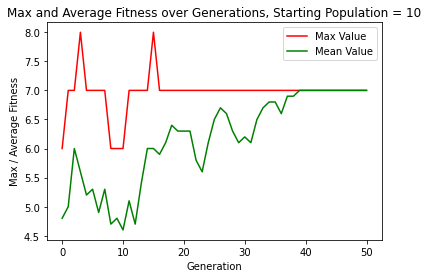

In [10]:
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 10, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)



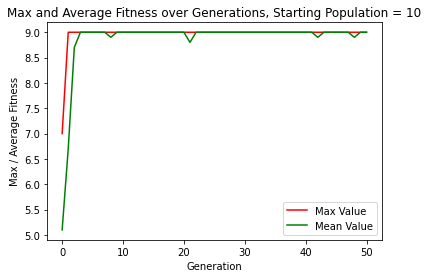

In [11]:
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 10, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

# Task

Add a new section in the Jupyter notebook for each of the following points to solve optimally the One Max problem:
1. Using roulette wheel selection 'selRoulette':
  * What is the smallest population size required?
  * What is the smallest number of generations required?
2. It is important to calculate the computational cost when solving an optimization problem and it is a common practice when using any metaheuristics to compute it in terms of individuals processed; the population size times the number of generations required. Playing around with the GA parameters, try to find an optimal solution giving the individuals processed for the following individual lenghts: 
  * ONE_MAX_LENGTH = 50
  * ONE_MAX_LENGTH = 100 
3. Create your own fitness function (FF) find the optimal solution and answer the questions:
  * Use 'selRoulette'.
  * Use the oneMaxFitness as a baseline.
  * Each bit is considered as a gen in the encoding.
  * The new FF must consider the maximum fitness when 50% of the individual's genes are 1.
  * Hint: `if i <= Individual_Length/2 return i else return Individual_Length-i`.
    * What is the smallest population size required?
    * What is the smallest number of generations required?
4. Use your new FF along with tournament selection 'selTournament' to answer:
  * What is the smallest number of individuals you need to process to solve the problem? 
  * Why this problem is much easier than the original One Max?

## What is the smallest population size required?

To Find the smallest population required I repeated the experiment increasing the population each time until the One Max problen has generated a single max value, in this case the value of 10. I repeated this 1000 times to get a distrubtion of the result and picked the mean as the samllest population required.

I am going off the bases that ones a max value from the one of the child that has been generated the problem has been solved 

In [12]:
def tune_pop_param(method = 'Max', _print = False):
    '''
    Loop One max problem, changing population until max value is reached
    '''   
    break_loop = False
    pop = 1
    while break_loop == False:

        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = pop, P_CROSSOVER = 0.7,
                    P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Roulette', plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 10:
            break_loop = True
            return pop
        if _print == True:
            print("population = {}, Max = {}".format(pop, compare))
        if pop == 100:
            return 100
        pop+=1        

In [13]:
pop_list = []
for i in tqdm(range(1000)):
    try:
        pop_list.append(tune_pop_param())
    except ValueError:
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:47<00:00,  9.28it/s]


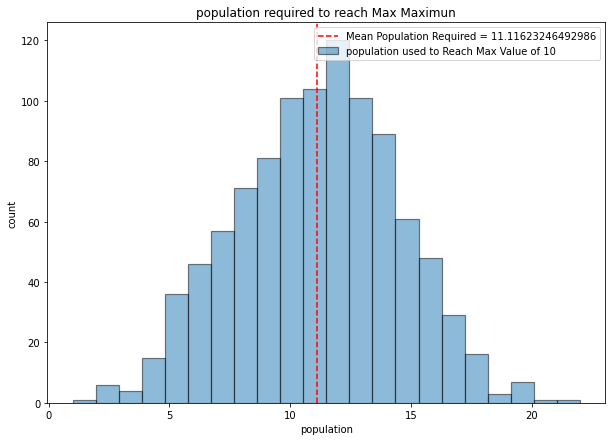

In [14]:
data = np.array(pop_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=22 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value of 10")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('population required to reach Max Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

In [15]:
print('Smallest population required to reached Max Value = {}'.format(data.min()))
print('Mean population required to reached Max Value = {}'.format(round(data.mean())))
print('Largest population required to reached Max Value = {}'.format(data.max()))

Smallest population required to reached Max Value = 1
Mean population required to reached Max Value = 11
Largest population required to reached Max Value = 22


As you can see the smallest population that can be picked varies hugely with the randomness of the starting population and the mutation through the generations, from a sample of 1000 runs the samllest popluation required to absolutly guarantee reaching the max is 22, when the number of generations is set to 50 



## What is the smallest number of generations required

To Find the smallest generations required I repeated the experiment with a fixed population of 11, found above, and starting the number of generations at 5 increasing by 5, until the One Max problem has generated a single max value, in this case the value of 10. I repeated this 1000 times to get a distrubtion of the result and picked the mean as the smallest number of generation  required.

In [16]:
def tune_gen_param(method = 'Max', _print = False):
    '''
    Loop One max problem, changing generations until max value is reached
    '''
    break_loop = False
    gen = 5
    while break_loop == False:

        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 11, P_CROSSOVER = 0.7,
                    P_MUTATION = 0.01, MAX_GENERATIONS = gen, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Roulette', plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 10:
            break_loop = True
            return gen
        if _print == True:
            print("population = {}, Max = {}".format(gen, compare))
        if gen == 200:
            return 200
        gen+= 5      


In [17]:
gen_list = []
for i in tqdm(range(1000)):
    try:
        gen_list.append(tune_gen_param())
    except ValueError:
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:03<00:00, 15.79it/s]


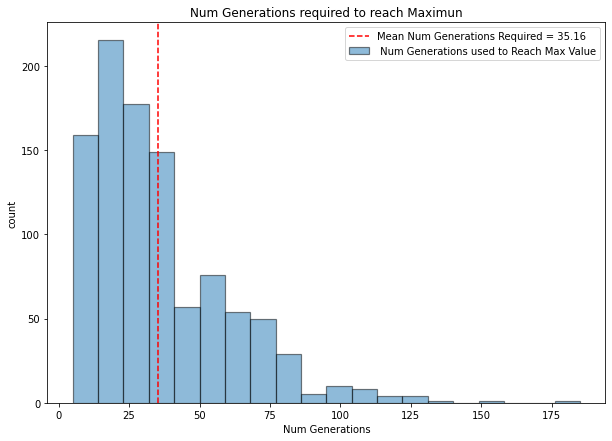

In [18]:
data = np.array(gen_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=20 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = " Num Generations used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Num Generations Required = {}'.format(data.mean()))
plt.title('Num Generations required to reach Maximun')
plt.xlabel('Num Generations')
plt.ylabel('count')
plt.legend()
plt.show()

In [19]:
print('Smallest Number of Generations required to reached Max Value = {}'.format(data.min()))
print('Mean Number of Generations required to reached Max Value = {}'.format(round(data.mean())))
print('Largest Number of Generations required to reached Max Value = {}'.format(data.max()))

Smallest Number of Generations required to reached Max Value = 5
Mean Number of Generations required to reached Max Value = 35
Largest Number of Generations required to reached Max Value = 185


Much like the population the smallest generation that can be picked varies hugely with the randomness of the starting population and the mutation through the generations, it is also dependent on the population size. from a sample of 1000 runs the smallest number of generation required to absolutly guarantee reaching the max is 185, when the popluation is set to 11. However the mean is 35, so this value will likely get a max solution



## try to find an optimal solution giving the individuals processed for ONE_MAX_LENGTH = 50

Starting Point

Check a few Populations and Generations as start point

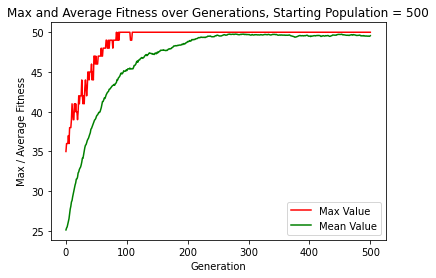

Wall time: 41.8 s


In [20]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 500, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 500, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)

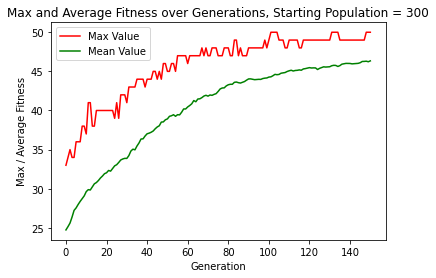

Wall time: 5.22 s


In [21]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 300, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 150, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)

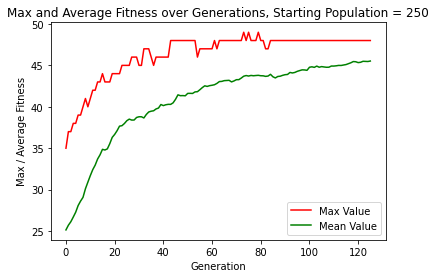

Wall time: 3.19 s


In [22]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)

Check if Tournament Causes the solution to Converge quicker

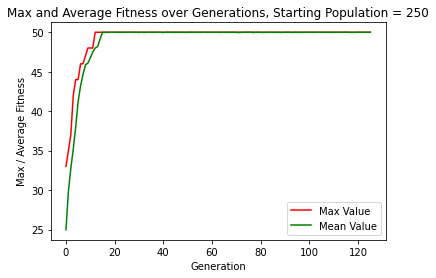

Wall time: 1.51 s


In [23]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

See how Cross Over effects optimization problem

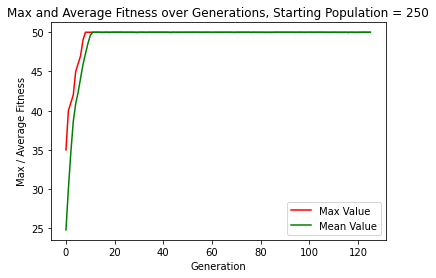

Wall time: 1.52 s


In [24]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 1,
            P_MUTATION = 0.01, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

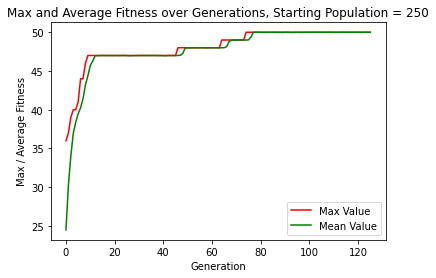

Wall time: 1.52 s


In [25]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 0.3,
            P_MUTATION = 0.01, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

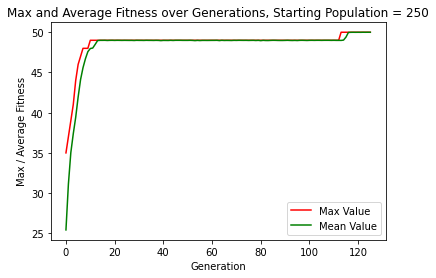

Wall time: 1.57 s


In [26]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 2,
            P_MUTATION = 0.01, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

See how P_MUTATION effects optimization problem

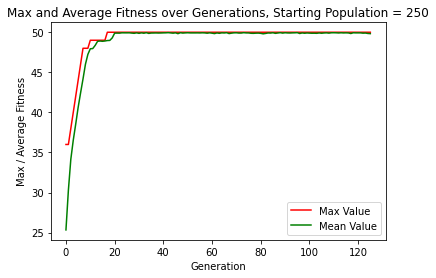

Wall time: 1.62 s


In [27]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 1,
            P_MUTATION = 0.1, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

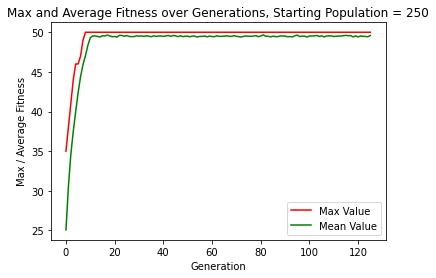

Wall time: 1.6 s


In [28]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 1,
            P_MUTATION = 0.5, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

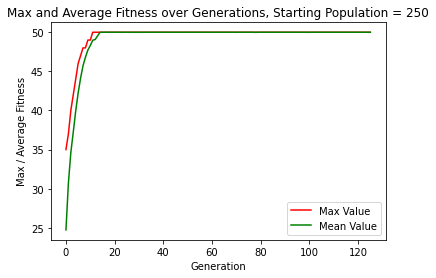

Wall time: 1.52 s


In [29]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 250, P_CROSSOVER = 1,
            P_MUTATION = 0.001, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

the following seems to optimse the problem the quickiest:
- POPULATION_SIZE = 250, 
- P_CROSSOVER = 1,
- P_MUTATION = 0.5, 
- MAX_GENERATIONS = 125, 
- HALL_OF_FAME_SIZE = 10, 
- And the Tournament as the selector


I will try tune the poluation size and the number of Generation to their lowest value as this is where the computational cost of genetic algorithm comes from

In [30]:
def tune_pop_param_50(method = 'Max', _print = False):
    break_loop = False
    pop = 10
    while break_loop == False:
        
        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = pop, P_CROSSOVER = 1,
                    P_MUTATION = 0.001, MAX_GENERATIONS = 125, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Tournament', k =10, plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 50:
            break_loop = True
            return pop
        if _print == True:
            print("population = {}, Max = {}".format(pop, compare))
        if pop > 500:
            return 500
        pop+=10   

In [31]:
pop_list = []
for i in tqdm(range(100)):
    try:
        pop_list.append(tune_pop_param_50())
    except ValueError:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [12:04<00:00,  7.25s/it]


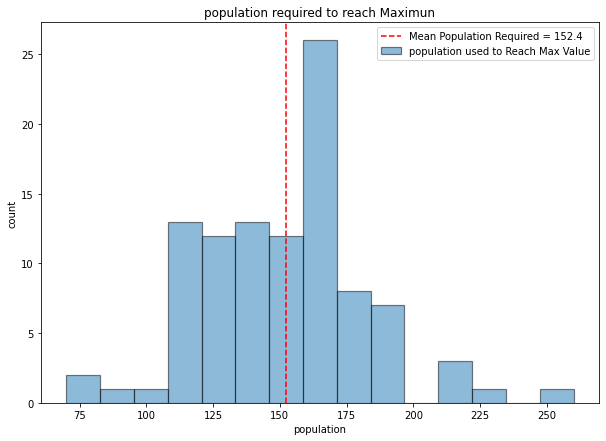

In [32]:
data = np.array(pop_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=15 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('population required to reach Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

In [33]:
def tune_gen_param_50(method = 'Max', _print = False):
    break_loop = False
    gen = 20
    while break_loop == False:

        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 50, POPULATION_SIZE = 160, P_CROSSOVER = 1,
                    P_MUTATION = 0.001, MAX_GENERATIONS = gen, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Tournament', k =10, plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 50:
            break_loop = True
            return gen
        if _print == True:
            print("MAX_GENERATIONS = {}, Max = {}".format(gen, compare))
        if gen > 500:
            return 500
        gen+= 20      

In [34]:
gen_list = []
for i in tqdm(range(100)):
    try:
        gen_list.append(tune_gen_param_50())
    except ValueError:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [05:22<00:00,  3.22s/it]


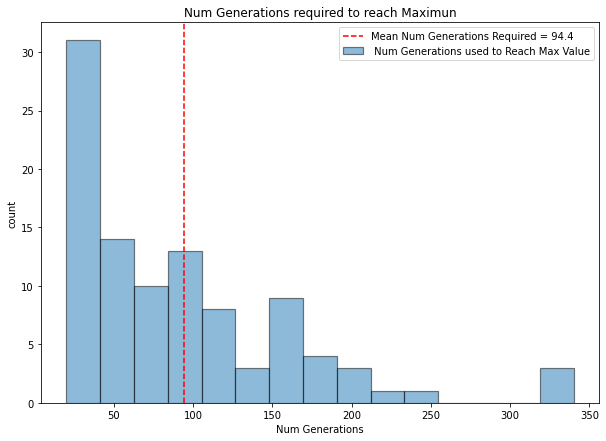

In [35]:
data = np.array(gen_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=15 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = " Num Generations used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Num Generations Required = {}'.format(data.mean()))
plt.title('Num Generations required to reach Maximun')
plt.xlabel('Num Generations')
plt.ylabel('count')
plt.legend()
plt.show()

Based on the Mean caluclauted from these experiments for population and number of Generations it in terms of individuals processed; the population size times the number of generations required is 100*160

## try to find an optimal solution giving the individuals processed for ONE_MAX_LENGTH = 100

Starting Point

Check a few Populations and Generations as start point

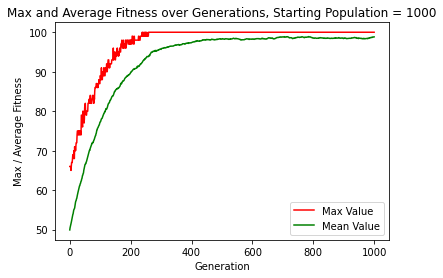

Wall time: 6min 54s


In [36]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 1000, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 1000, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)

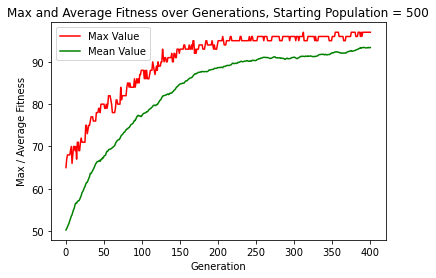

Wall time: 47.8 s


In [37]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 400, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', k =10, plot = True)

Check if Tournament Causes the solution to Converge quicker

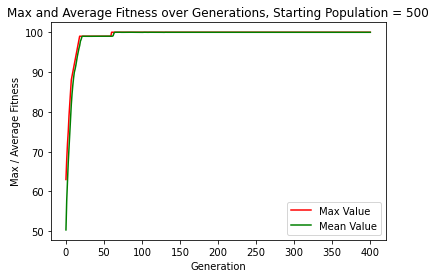

Wall time: 18.9 s


In [38]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 400, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

See how Cross Over effects optimization problem

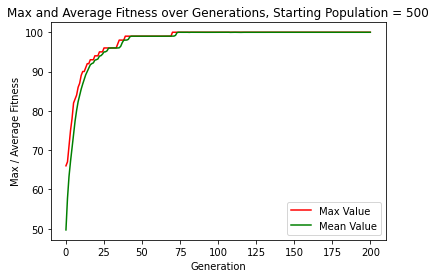

Wall time: 8.77 s


In [39]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

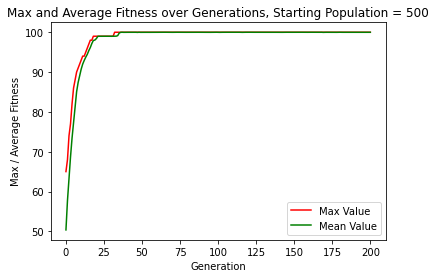

Wall time: 9 s


In [40]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER =1,
            P_MUTATION = 0.01, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

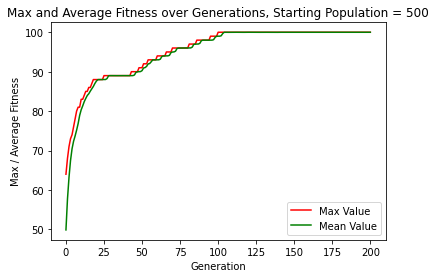

Wall time: 8.48 s


In [41]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER = 0.3,
            P_MUTATION = 0.01, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

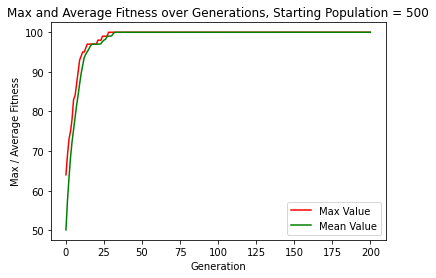

Wall time: 8.59 s


In [42]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER = 2,
            P_MUTATION = 0.01, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

See how P_MUTATION effects optimization problem

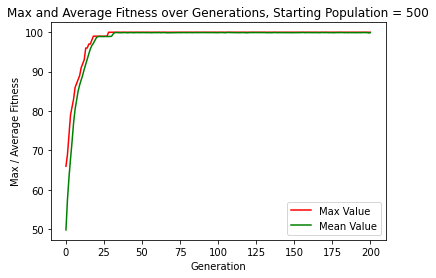

Wall time: 8.79 s


In [43]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER =1,
            P_MUTATION = 0.1, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

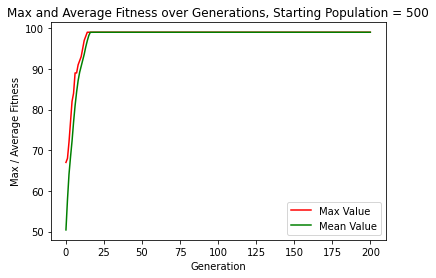

Wall time: 9.57 s


In [44]:
%%time
_mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 500, P_CROSSOVER =1,
            P_MUTATION = 0.001, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k =10, plot = True)

In [45]:
def tune_pop_param_100(method = 'Max', _print = False):
    break_loop = False
    pop = 14
    while break_loop == False:

        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = pop, P_CROSSOVER =1,
                    P_MUTATION = 0.1, MAX_GENERATIONS = 200, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Tournament', k =10, plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()

        if _print == True:
            print("population = {}, Max = {}".format(pop, compare))
            
        if compare == 100:
            break_loop = True
            return pop

        if pop > 1000:
            return 1000
        pop+=2   

In [46]:
pop_list = []
for i in tqdm(range(50)):
    try:
        pop_list.append(tune_pop_param_100())
    except ValueError:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [03:20<00:00,  4.02s/it]


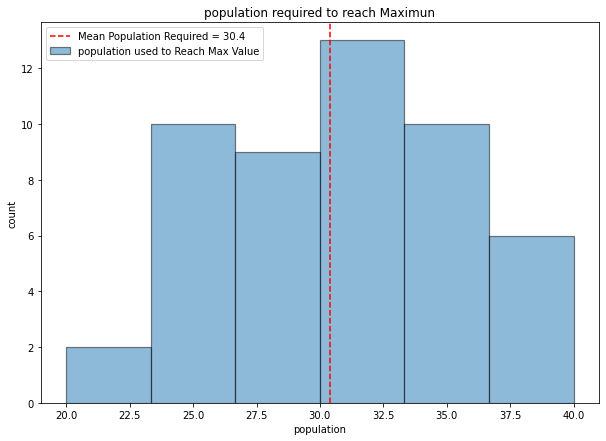

In [47]:
data = np.array(pop_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=6 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('population required to reach Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

In [48]:
def tune_gen_param_100(method = 'Max', _print = False):
    break_loop = False
    gen = 50
    while break_loop == False:

        _mean, _max =  run_Exp(oneMaxFitness, ONE_MAX_LENGTH = 100, POPULATION_SIZE = 35, P_CROSSOVER =1,
                    P_MUTATION = 0.1, MAX_GENERATIONS = gen, HALL_OF_FAME_SIZE = 10, 
                    sel = 'Tournament', k =10, plot = False)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 100:
            break_loop = True
            return gen
        if _print == True:
            print("MAX_GENERATIONS = {}, Max = {}".format(gen, compare))
        if gen > 500:
            return 500
        gen+= 10      

In [49]:
gen_list = []
for i in tqdm(range(50)):
    try:
        gen_list.append(tune_gen_param_100())
    except ValueError:
        pass

100%|██████████████████████████████████████████████████████████████████████████████████| 50/50 [04:05<00:00,  4.92s/it]


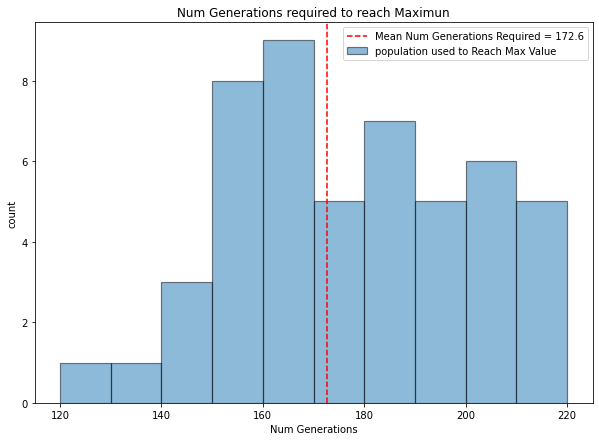

In [50]:
data = np.array(gen_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=10 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Num Generations Required = {}'.format(data.mean()))
plt.title('Num Generations required to reach Maximun')
plt.xlabel('Num Generations')
plt.ylabel('count')
plt.legend()
plt.show()

Based on the Mean caluclauted from these experiments for population and number of Generations it in terms of individuals processed; the population size times the number of generations required is 30*170

Interesting the this is much smaller than the ONE_MAX_LENGTH = 50, which I didnt expect. This could be down to the randomness of the Tournament 

## Create your own fitness function (FF) 

Use 'selRoulette'.

Use the oneMaxFitness as a baseline.

Each bit is considered as a gen in the encoding.

The new FF must consider the maximum fitness when 50% of the individual's genes are 1.

Hint: if i <= Individual_Length/2 return i else return Individual_Length-i.

In [51]:
def halfMaxFitness(individual):
    Individual_Length = len(individual)
    i = sum(individual)   
    if i <= Individual_Length/2:
        return i,
    else:
        return Individual_Length-i,

Hall of Fame Individuals = 
[0, 0, 1, 0, 0, 1, 1, 1, 1, 0]
[1, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 1, 0, 0, 0, 1, 1, 1, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 0, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 0]
[0, 0, 1, 1, 0, 1, 1, 1, 0, 1]
[0, 0, 1, 1, 0, 1, 1, 0, 0, 0]
[1, 0, 1, 0, 1, 1, 0, 1, 0, 1]
Best Ever Individual =  [0, 0, 1, 0, 0, 1, 1, 1, 1, 0]


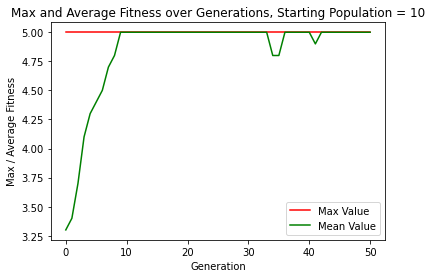

In [52]:
_mean, _max =  run_Exp(halfMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 10, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette', plot = True, _print=True)


In [53]:
def tune_gen_param_2(method = 'Max', _print = False):
    break_loop = False
    gen = 1
    while break_loop == False:

        _mean, _max =  run_Exp(halfMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 10, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = gen, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette')
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 5:
            break_loop = True
            return gen
        if _print == True:
            print("population = {}, Max = {}".format(gen, compare))
        if gen == 200:
            return 200
        gen+= 1     
        
def tune_pop_param_2(method = 'Max', _print = False):
    break_loop = False
    pop = 1
    while break_loop == False:

        _mean, _max =  run_Exp(halfMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = pop, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Roulette')
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 5:
            break_loop = True
            return pop
        if _print == True:
            print("population = {}, Max = {}".format(pop, compare))
        if pop == 100:
            return 100
        pop+=1 

### What is the smallest population size required?

In [54]:
pop_list = []
for i in tqdm(range(1000)):
    try:
        pop_list.append(tune_pop_param_2())
    except ValueError:
        pass

100%|██████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:11<00:00, 84.36it/s]


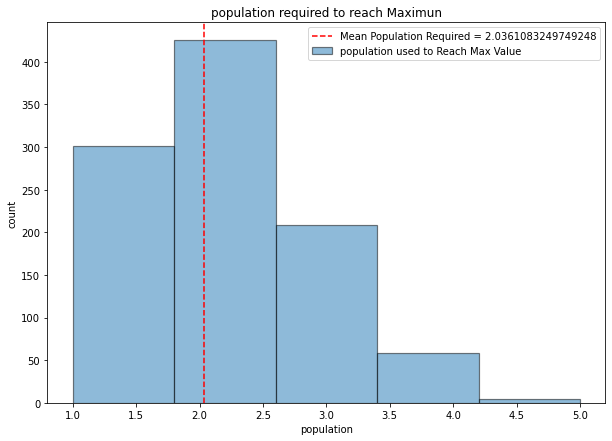

In [55]:
data = np.array(pop_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=5 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('population required to reach Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

In [56]:
print('Smallest population required to reached Max Value = {}'.format(data.min()))
print('Mean population required to reached Max Value = {}'.format(round(data.mean())))
print('Largest population required to reached Max Value = {}'.format(data.max()))

Smallest population required to reached Max Value = 1
Mean population required to reached Max Value = 2
Largest population required to reached Max Value = 5


### What is the smallest number of generations required?

In [57]:
gen_list = []
for i in tqdm(range(1000)):
    try:
        gen_list.append(tune_gen_param_2())
    except ValueError:
        pass

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:01<00:00, 738.33it/s]


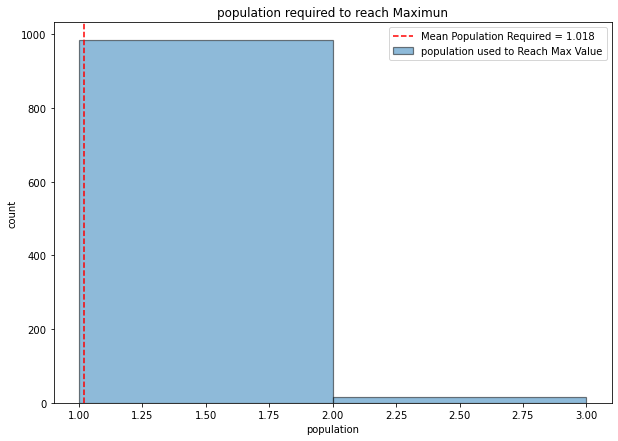

In [58]:
data = np.array(gen_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=2 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('population required to reach Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

In [59]:
print('Smallest Number of Generations required to reached Max Value = {}'.format(data.min()))
print('Mean Number of Generations required to reached Max Value = {}'.format(round(data.mean())))
print('Largest Number of Generations required to reached Max Value = {}'.format(data.max()))

Smallest Number of Generations required to reached Max Value = 1
Mean Number of Generations required to reached Max Value = 1
Largest Number of Generations required to reached Max Value = 3


## Use your new FF along with tournament selection 'selTournament' to answer:

### What is the smallest number of individuals you need to process to solve the problem?

In [60]:
def tune_k_param(method = 'Max', _print = False):
    break_loop = False
    k = 1
    while break_loop == False:

        _mean, _max =  run_Exp(halfMaxFitness, ONE_MAX_LENGTH = 10, POPULATION_SIZE = 2, P_CROSSOVER = 0.7,
            P_MUTATION = 0.01, MAX_GENERATIONS = 50, HALL_OF_FAME_SIZE = 10, 
            sel = 'Tournament', k=k)
        
        if method == 'Max':
            compare = _max.max()
        else:
            compare = _mean.max()
        
        if compare == 5:
            break_loop = True
            return k
        if _print == True:
            print("population = {}, Max = {}".format(k, compare))
        if k == 100:
            return 100
        k+=1 

In [61]:
k_list = []
for i in tqdm(range(10000)):
    try:
        k_list.append(tune_k_param())
    except ValueError:
        pass

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [01:46<00:00, 94.01it/s]


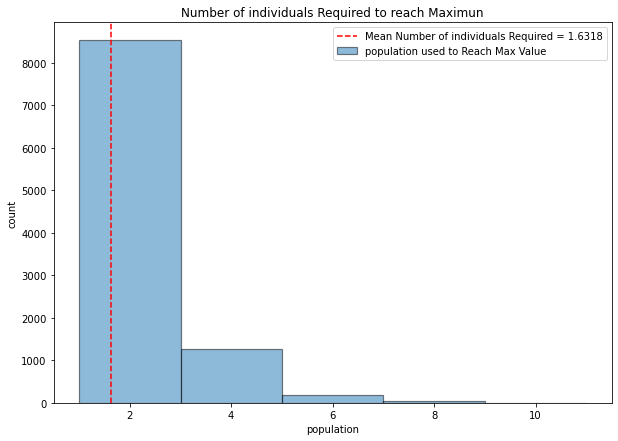

In [62]:
data = np.array(k_list)

plt.figure(figsize=(10,7))
plt.hist(data, bins=5 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "population used to Reach Max Value")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Number of individuals Required = {}'.format(data.mean()))
plt.title('Number of individuals Required to reach Maximun')
plt.xlabel('population')
plt.ylabel('count')
plt.legend()
plt.show()

### Why this problem is much easier than the original One Max?

This is because the max value is 5, which on average is what is most likely to be created from the startng population

In [63]:
avg_sum = []

population = toolbox.populationCreator(n=1000000)
for p in population:
    avg_sum.append(sum(p))

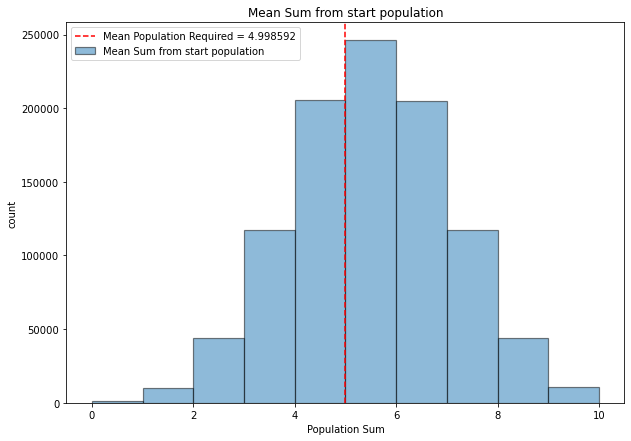

In [64]:
data = np.array(avg_sum)

plt.figure(figsize=(10,7))
plt.hist(data, bins=10 ,alpha=0.5, edgecolor='black', linewidth=1.2, label = "Mean Sum from start population")
plt.axvline(data.mean(),color='red',ls='--', label = 'Mean Population Required = {}'.format(data.mean()))
plt.title('Mean Sum from start population')
plt.xlabel('Population Sum')
plt.ylabel('count')
plt.legend()
plt.show()

# Conclusion 

This was the first time I had been introduced into generic algorithms. I have found reading and learning about this very interesting. My learnings from this are:

- If there are loads permutations for the problem GA can be vert helpful to solve that problem
- The computational cost can increase very quickly as ONE_MAX_LENGTH, POPULATION_SIZE and MAX_GENERATIONS increases
- For the experiments that I ran with the larger ONE_MAX_LENGTH, Tournament finds the max solution much quicker with less population than roulette 
- The  P_CROSSOVER and P_MUTATION can have a large impact on iterations/computational cost 
- Using this deap library you are at the mercy of the randomness of the starting popluation and the mutations to to find the Maximise the problem, this is why I repeated/looped all my experiemnts to capture the mean.